# Loading the data from github

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/Kolo-Naukowe-Data-Science-PW/Rekrutacja_2023/main/spaceship_titanic/poprawne_dane.csv"

data_raw = pd.read_csv(url)

In [3]:
data_raw.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
8,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
9,0008_03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True


In [4]:
len(data_raw)

6466

In [5]:
data_raw.isnull().values.any()

np.False_

In [6]:
def text_split(input,at):
    parts = input.split('/')
    return parts[at]

data_raw["Deck"]=data_raw["Cabin"].map(lambda x:text_split(x,0)).values

data_raw["Num"] = data_raw["Cabin"].map(lambda x: text_split(x,1)).values

data_raw["Side"] = data_raw["Cabin"].map(lambda x: text_split(x,2)).values

# Exploring Categorical Columns

### First glimpse at the cateogrical data

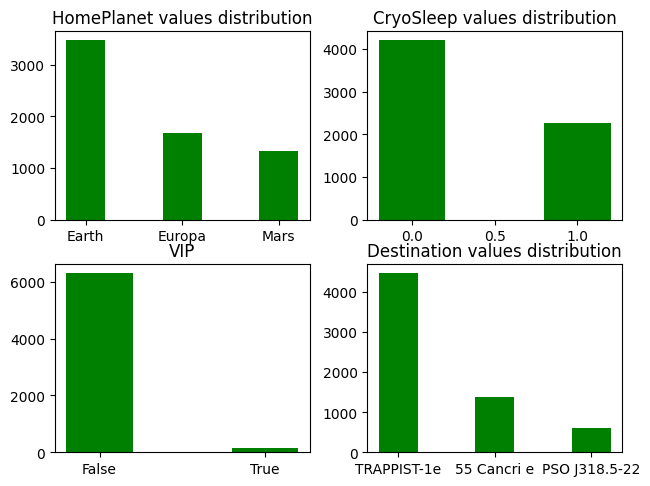

In [7]:
fig, axs = plt.subplots(2,2)
fig.tight_layout()


home_planet= data_raw["HomePlanet"].value_counts()
cryosleep = data_raw["CryoSleep"].value_counts()
destination = data_raw["Destination"].value_counts()
vip = data_raw["VIP"].value_counts()

axs[0,0].set_title("HomePlanet values distribution")
axs[0,0].bar(home_planet.index,home_planet.values,width=0.4,color='g')

axs[0,1].set_title("CryoSleep values distribution")
axs[0,1].bar(cryosleep.index,cryosleep.values,width=0.4,color='g')

axs[1,1].set_title("Destination values distribution")
axs[1,1].bar(destination.index,destination.values,width=0.4,color='g')

axs[1,0].set_title("VIP")
axs[1,0].bar(["False","True"],vip.values,width=0.4,color='g')
plt.show()


### Most choosen routes

Text(0.5, 14.722222222222216, 'Destinations')

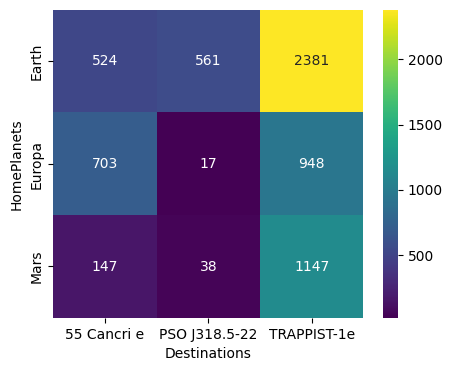

In [8]:
data_counts = data_raw.groupby(["HomePlanet","Destination"]).size().unstack(fill_value=0)


planets = data_counts.columns
destinations = data_counts.index
tablica = data_counts.values

fig,ax = plt.subplots(figsize=(5,4))

sns.heatmap(tablica,annot=True,cmap="viridis",fmt="d",xticklabels=planets,yticklabels=destinations,ax=ax)

ax.set_ylabel("HomePlanets")
ax.set_xlabel("Destinations")

[Text(0, 0.5, 'Earth'), Text(0, 1.5, 'Europa'), Text(0, 2.5, 'Mars')]

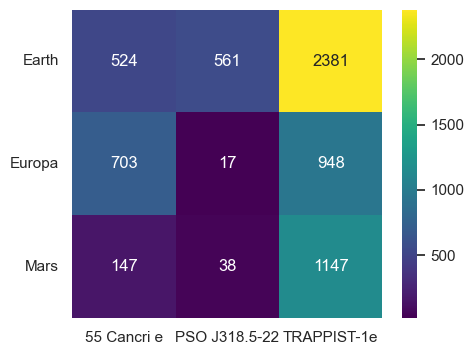

In [114]:
data_counts = data_raw.groupby(["HomePlanet","Destination"]).size().unstack(fill_value=0)


planets = data_counts.columns
destinations = data_counts.index
tablica = data_counts.values

fig,ax = plt.subplots(figsize=(5,4))

sns.heatmap(tablica,annot=True,cmap="viridis",fmt="d",xticklabels=planets,yticklabels=destinations,ax=ax)


ax.set_yticklabels(rotation=0,labels=destinations)


### Average expenses for vip and non-vip passengers on each 

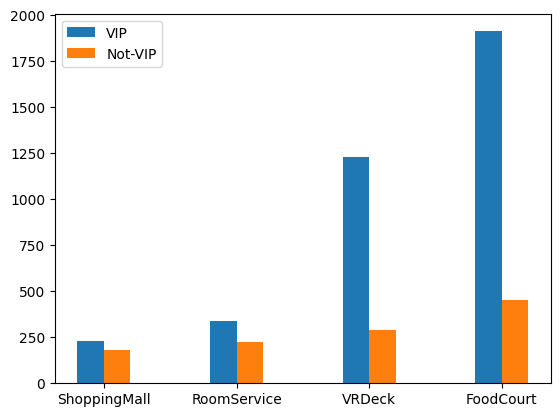

In [10]:
data_raw["Sum"]= data_raw[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].sum(axis=1)
data_raw

x = data_raw.groupby(["VIP"])[["RoomService","VRDeck","ShoppingMall","FoodCourt"]].mean()

vip_true = x.loc[True].sort_values().to_dict()

vip_false = x.loc[False].sort_values().to_dict()

x_ind = np.arange(len(vip_false.keys()))

plt.bar(x_ind-0.1,vip_true.values(),label="VIP",width=0.2)
plt.bar(x_ind+0.1,vip_false.values(),label="Not-VIP",width=0.2)
plt.xticks(np.arange(4),vip_false.keys())
plt.legend()
plt.show()

# fig,ax = plt.subplots(figsize=(5,4))

# sns.heatmap(x.values,annot=True,xticklabels=x.columns,yticklabels=["Non-VIP","VIP"],fmt="g")

In [11]:
len(data_raw["Deck"].unique())

8

(array([1.3811e+04, 3.7000e+01, 5.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([    0. ,  3178.4,  6356.8,  9535.2, 12713.6, 15892. ]),
 <BarContainer object of 5 artists>)

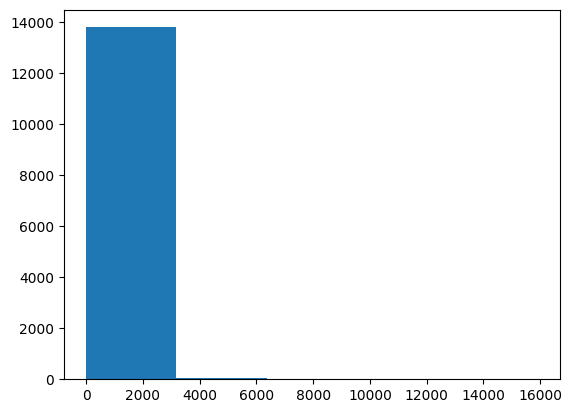

In [12]:
x = data_raw.groupby(["Deck","Num"])["ShoppingMall"].sum().unstack()
x = x.fillna(0)
x = pd.DataFrame(x)
x.columns
x.columns = [int(name) for name in x.columns]


x = x.reindex(sorted(x.columns),axis=1)
x.to_numpy().flatten()


plt.hist(x.to_numpy().flatten(),5)


# ax = sns.heatmap(x.values)

# ax.set_xticks(0,1894,100)
# ax.set_yticks(x.index)


<BarContainer object of 2 artists>

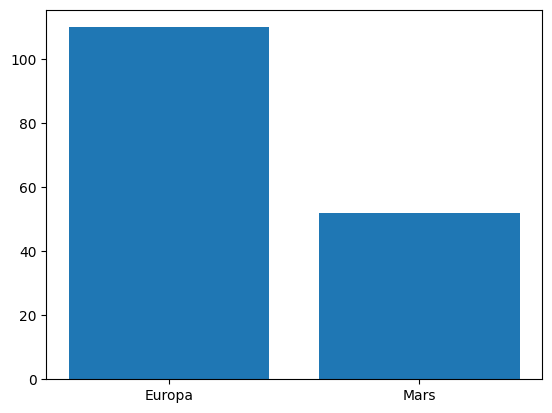

In [13]:
vip_true_df = data_raw.loc[data_raw["VIP"]==True]

vip_true_df["HomePlanet"].value_counts().index

plt.bar(vip_true_df["HomePlanet"].value_counts().index,vip_true_df["HomePlanet"].value_counts().values)

In [14]:
data_raw

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Sum
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P,8536.0
6462,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S,0.0
6463,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S,1873.0
6464,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S,4637.0


In [15]:

#Profile of average VIP
x = data_raw.groupby(["VIP"]).agg({"Age":["mean"],"HomePlanet":[pd.Series.mode],"Destination":[pd.Series.mode],"Transported":[pd.Series.mode],
                                         "Sum":["mean"],"RoomService":["mean"],"ShoppingMall":["mean"],"Spa":["mean"],"FoodCourt":["mean"]})
x

,Age,HomePlanet,Destination,Transported,Sum,RoomService,ShoppingMall,Spa,FoodCourt
,mean,mode,mode,mode,mean,mean,mean,mean,mean
VIP,,,,,,,,,
False,29.304569,Earth,TRAPPIST-1e,False,1453.589943,224.911643,181.041561,308.103585,452.764911
True,37.888889,Europa,TRAPPIST-1e,False,4490.067901,340.987654,228.006173,780.617284,1912.160494


In [16]:
x = data_raw.groupby(["Transported"]).agg({"Age":["mean"],"HomePlanet":[pd.Series.mode],"Destination":[pd.Series.mode],
                                         "Sum":["mean"],"RoomService":["mean"],"ShoppingMall":["mean"],"Spa":["mean"],"FoodCourt":["mean"]})
x

,Age,HomePlanet,Destination,Sum,RoomService,ShoppingMall,Spa,FoodCourt
,mean,mode,mode,mean,mean,mean,mean,mean
Transported,,,,,,,,
False,30.324424,Earth,TRAPPIST-1e,2062.643011,386.470968,172.887250,570.670353,388.773579
True,28.703831,Earth,TRAPPIST-1e,989.386173,66.994706,191.677048,65.777951,591.261912


# VIP's choosen destination

<Axes: >

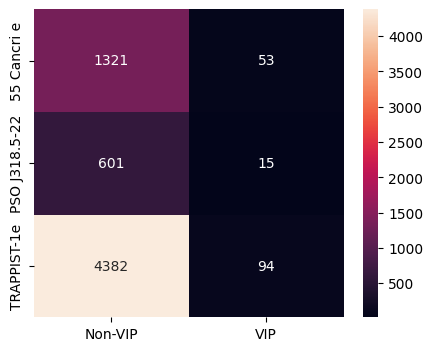

In [17]:
x = data_raw.groupby(["VIP"])["Destination"].value_counts().unstack()
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(x.values.T,xticklabels=["Non-VIP","VIP"],yticklabels=x.columns,fmt="d",annot=True)

# VIP's HomePlanet

<Axes: >

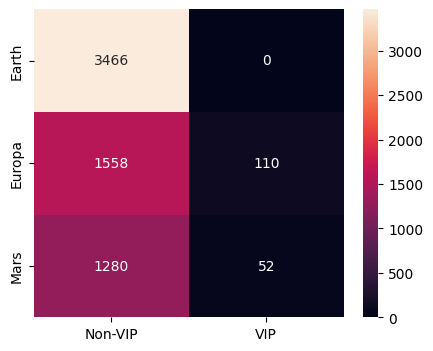

In [18]:
x = data_raw.groupby(["VIP"])["HomePlanet"].value_counts().unstack()
x =x.fillna(0)

fig,ax = plt.subplots(figsize=(5,4))

sns.heatmap(x.values.T,xticklabels=["Non-VIP","VIP"],yticklabels=x.columns,annot=True,fmt="g")

In [19]:
data_raw

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Sum
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P,8536.0
6462,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S,0.0
6463,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S,1873.0
6464,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S,4637.0


#### Expenses and Age

C:\Users\bzabk\AppData\Local\Temp\ipykernel_10708\2721302936.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = data_raw.groupby(["Age_group"])["Sum"].sum()
C:\Users\bzabk\AppData\Local\Temp\ipykernel_10708\2721302936.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(rotation=45,labels=x["Age_group"])


Text(0.5, 1.0, 'Percentage share of each age group in total expenditure')

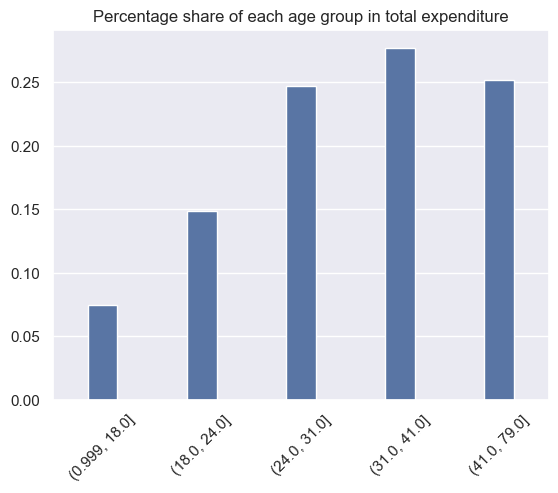

In [20]:
income = data_raw["Sum"].sum()

data_raw["Age_group"] = pd.qcut(data_raw["Age"],q=5)
x = data_raw.groupby(["Age_group"])["Sum"].sum()
x = x/income
x = x.reset_index()
sns.set_theme(style="darkgrid")
ax = sns.barplot(x,x="Age_group",y="Sum",width=0.3)

ax.set_xlabel('')
ax.set_ylabel('')



ax.set_xticklabels(rotation=45,labels=x["Age_group"])

ax.set_title('Percentage share of each age group in total expenditure')

C:\Users\bzabk\AppData\Local\Temp\ipykernel_10708\2347167156.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = data_raw.groupby(["Age_group"])[["Sum","FoodCourt","RoomService","ShoppingMall","Spa","VRDeck"]].mean()


Text(0, 0.5, '')

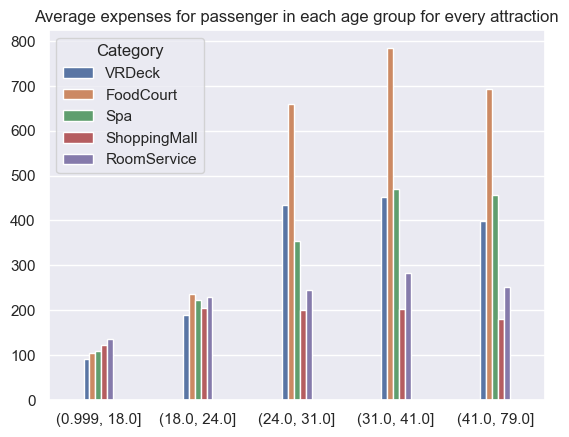

In [109]:

x = data_raw.groupby(["Age_group"])[["Sum","FoodCourt","RoomService","ShoppingMall","Spa","VRDeck"]].mean()
x = x.reset_index()
x=pd.melt(x,id_vars='Age_group', value_vars=["FoodCourt","RoomService","ShoppingMall","Spa","VRDeck"],
                   var_name='Category', value_name='Value')

x=x.sort_values(by=["Age_group","Value"],ascending=[True,True])
z = sns.barplot(data=x,x="Age_group",y="Value",width=0.3,hue='Category',dodge=True)
z.set_title("Average expenses for passenger in each age group for every attraction")
z.set_xlabel('')
z.set_ylabel('')

#### Deck with expenses summary

[Text(0, 0.5, 'A'),
 Text(0, 1.5, 'B'),
 Text(0, 2.5, 'C'),
 Text(0, 3.5, 'D'),
 Text(0, 4.5, 'E'),
 Text(0, 5.5, 'F'),
 Text(0, 6.5, 'G'),
 Text(0, 7.5, 'T')]

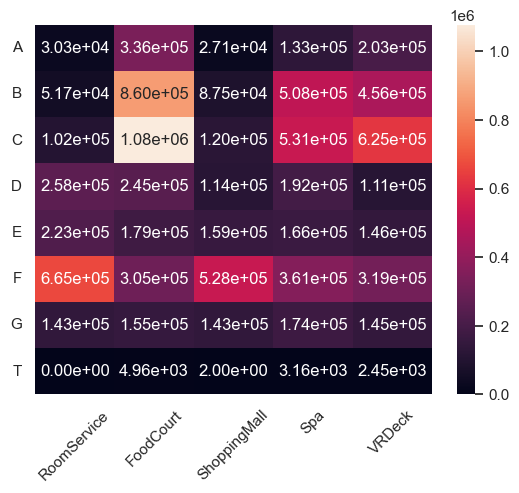

In [46]:
x = data_raw.groupby(["Second_Name","Deck"])
x = data_raw.groupby(["Deck"])[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].sum()

map = sns.heatmap(x.values,xticklabels=x.columns,yticklabels=x.index,fmt=".2e",annot=True)
map.set_xticklabels(rotation=45,labels=x.columns)
map.set_yticklabels(rotation=0,labels=x.index)

              0
Second_Name    
Acobson       4
Acobsond      2
Adavisons     9
Adkinson      2
Admingried    3
...          ..
Wynneyerson   1
Yanton        5
Yatters       3
Yorkland     10
Youngrayes    2

[2110 rows x 1 columns]
Type
mid     1002
low      994
high     114
Name: count, dtype: int64


C:\Users\bzabk\AppData\Local\Temp\ipykernel_10708\3554033398.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  x = x.groupby(["Second_Name"]).apply(len)


<Axes: ylabel='Count'>

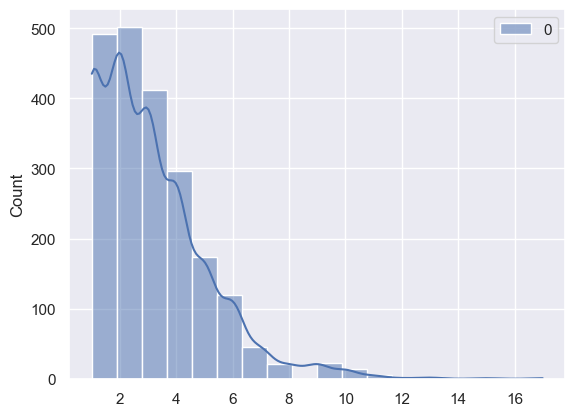

In [24]:
def get_second(input):
    sep = input.split(" ")
    return sep[1]

def get_value(input):
    if input<=2:
        return "low"
    if input>=3 and input<=6:
        return "mid"
    else:
        return "high"

data_raw["Second_Name"] = data_raw["Name"].apply(get_second)
x = data_raw
x = x.groupby(["Second_Name"]).apply(len)
x = pd.DataFrame(x)
print(x)
x["Type"] = x[0].apply(get_value)
print(x["Type"].value_counts())
sns.histplot(x.values,kde="True",bins=18)

[]

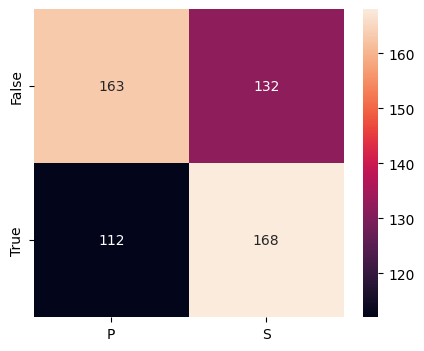

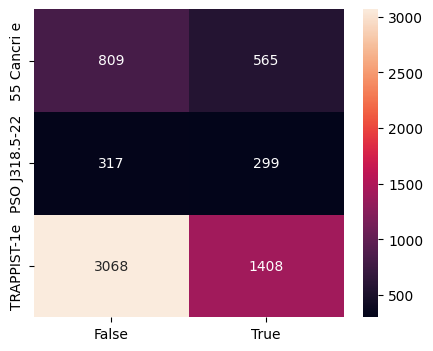

In [ ]:
df = data_raw.loc[data_raw['Age']>50]
df_home_cry = df.groupby(["Transported","Side"]).size().unstack(fill_value=0)

df_home_cry.columns
df_home_cry.index
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(df_home_cry.values,annot=True,fmt="d",ax=ax,xticklabels=df_home_cry.columns,yticklabels=df_home_cry.index)
plt.plot()
df_home_cry = data_raw.groupby(["Destination","CryoSleep"]).size().unstack(fill_value=0)

df_home_cry.columns
df_home_cry.index
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(df_home_cry.values,annot=True,fmt="d",ax=ax,xticklabels=df_home_cry.columns,yticklabels=df_home_cry.index)
plt.plot()

Transported  False  True 
VIP                      
False         3153   3151
True           102     60


<Axes: >

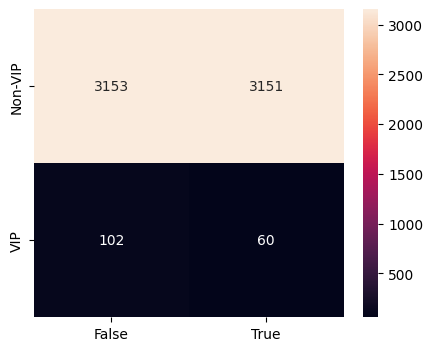

In [ ]:
x  = data_raw.groupby(["VIP"])["Transported"].value_counts().unstack()
fig,ax = plt.subplots(figsize=(5,4))
print(x)

sns.heatmap(x.values,xticklabels=x.columns,yticklabels=["Non-VIP","VIP"],annot=True,fmt="g")

In [51]:
x = data_raw.groupby(["Second_Name","VIP"])
x

In [108]:
data_raw.groupby(["Deck"]).size()

Deck
A     204
B     628
C     585
D     374
E     680
F    2116
G    1877
T       2
dtype: int64

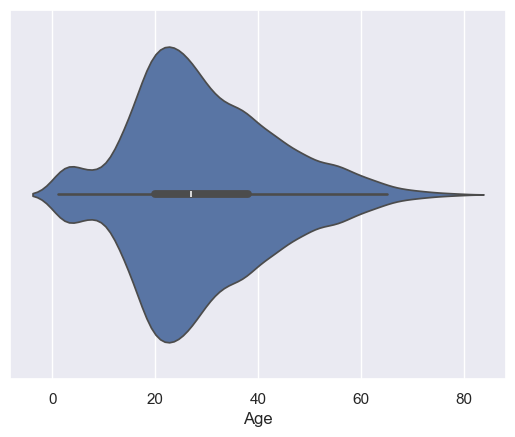

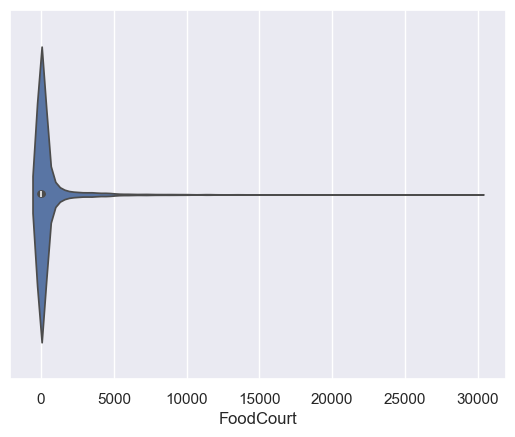

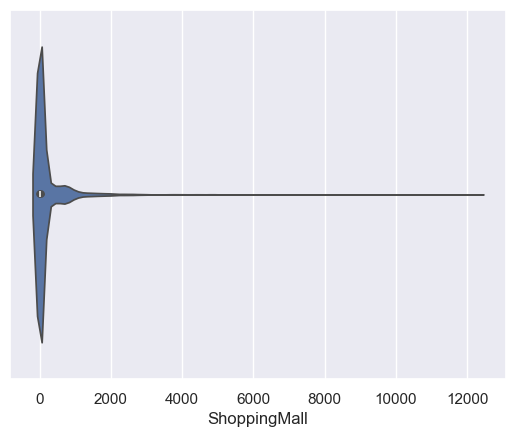

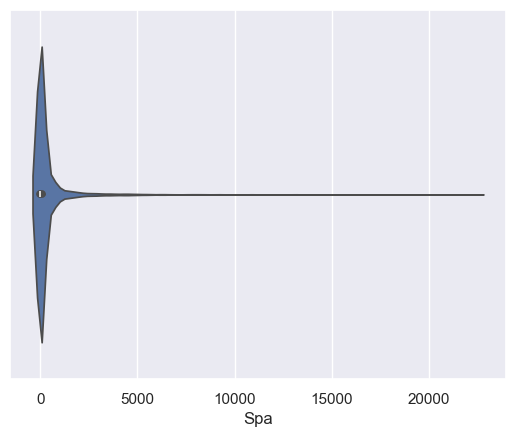

489.3287967831735
29813.0
0.0


In [110]:
sns.violinplot(x=data_raw["Age"])
plt.show()
sns.violinplot(x=data_raw["FoodCourt"])
plt.show()
sns.violinplot(x=data_raw["ShoppingMall"])
plt.show()
sns.violinplot(x=data_raw["Spa"])
plt.show()
print(data_raw["FoodCourt"].mean())
print(data_raw["FoodCourt"].max())
print(data_raw["FoodCourt"].min())